# Learning Curve

### Linear Origin Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define X data (bias + weigths)
def define_X_include_bias(X):
    X_b = np.c_[np.zeros((len(X), 1)), X]
    return X_b

# Normal Equation
def normalEquation(X, y):
    optimized_weights = np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y)) # w = (XT * X)^-1 * (XT * y)
    return optimized_weights

# Linear Regression
def linearRegression(X, W):
    return np.dot(X, W)

def meanModel(models):
    return np.mean(models, axis=0) 

def costFunction(n_samples, y_pred, y):                     # Mean Sqaure Error (MSE)
    return (1 / (2 * n_samples)) * np.sum((y_pred - y)**2)

In [2]:
# Define the function
def problem(X):
    epsilon = np.random.randn(len(X)) * 0.3  # Noise with standard deviation of 0.3
    return np.sin(np.pi * X) + epsilon

(100,)
(100, 2)


(-2.0, 2.0)

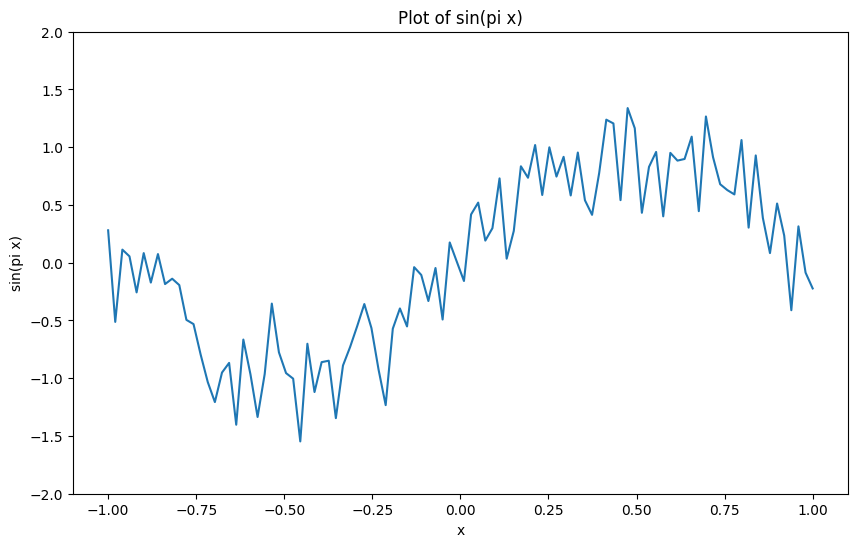

In [3]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Define X data (bias + weigths)
X_include_bias = define_X_include_bias(X)
print(X_include_bias.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

In [4]:
sample_size_sets = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# every value from dataset that possible
E_in = [[] for _ in range(len(sample_size_sets))]
E_d = [[] for _ in range(len(sample_size_sets))]
E_out_all = []


for i in range(len(sample_size_sets)):
    for _ in range(1000):
        # random i values from problem dataset
        rands_X = np.random.choice(X, sample_size_sets[i])
        y_sample = problem(rands_X)

        X_sample = define_X_include_bias(rands_X)

        W = normalEquation(X_sample, y_sample)
        
        # for calculate E_out
        y_pred_validation = linearRegression(X=X_include_bias, W=W)
        E_d[i].append(y_pred_validation)
        
        # for calculate E_in
        y_pred_training = linearRegression(X=X_sample, W=W)
        E_in[i].append(costFunction(sample_size_sets[i], y_pred=y_pred_training, y=y_sample))

    mean_model = meanModel(np.array(E_d[i]))
    print("Sample Size: ", sample_size_sets[i])
    z = np.square(mean_model - y)
    bias = np.mean(z)
    print(f"Bias: {bias}")
    
    z = np.square(E_d[i] - mean_model)
    var_x = np.mean(z)
    variance = np.mean(var_x)
    print(f"Variance: {variance}")
    
    E_out = bias + variance + (0.3 ** 2)
    print(f"E_out: {E_out}\n")
    E_out_all.append(E_out)


E_in_all = []
for i in range(len(E_in)):
    E_in_all.append(np.mean(E_in[i]))

print(np.array(E_in_all))
print(np.array(sample_size_sets).shape)


Sample Size:  2
Bias: 0.40434575423794555
Variance: 0.4461591024227617
E_out: 0.9405048566607072

Sample Size:  10
Bias: 0.31491163735963146
Variance: 0.04699599303406045
E_out: 0.45190763039369186

Sample Size:  20
Bias: 0.3087151103522297
Variance: 0.018238117351249687
E_out: 0.4169532277034794

Sample Size:  30
Bias: 0.30831969196993897
Variance: 0.012969530987275657
E_out: 0.4112892229572146

Sample Size:  40
Bias: 0.30831530945196856
Variance: 0.00930449719273033
E_out: 0.4076198066446989

Sample Size:  50
Bias: 0.30785668735938687
Variance: 0.00680551928446727
E_out: 0.4046622066438541

Sample Size:  60
Bias: 0.30766980264965177
Variance: 0.006217496876954723
E_out: 0.4038872995266065

Sample Size:  70
Bias: 0.3072926901944572
Variance: 0.005416888024189612
E_out: 0.40270957821864684

Sample Size:  80
Bias: 0.30774688777960313
Variance: 0.004450292518967248
E_out: 0.4021971802985703

Sample Size:  90
Bias: 0.3077256129839661
Variance: 0.003911222849695765
E_out: 0.401636835833661

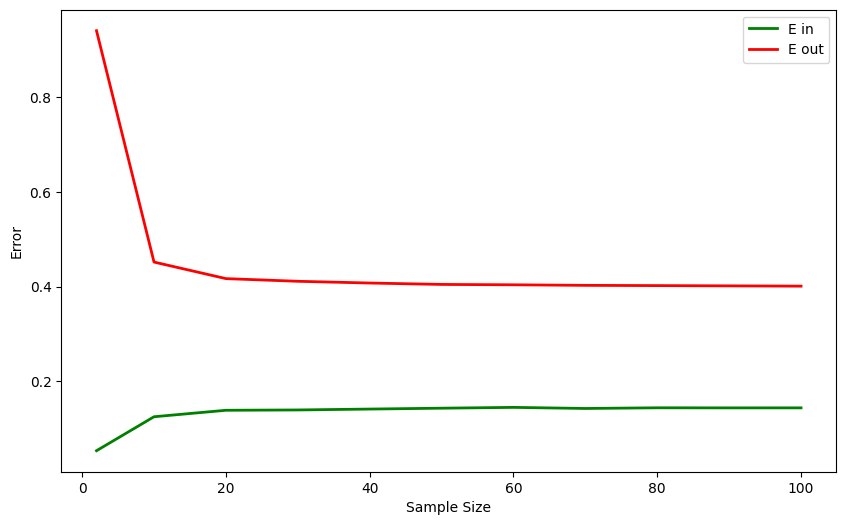

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(sample_size_sets, E_in_all, label='E in', c="green", linewidth=2.0)
plt.plot(sample_size_sets, E_out_all, label='E out', c="red", linewidth=2.0)
plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.legend()
plt.show()